# 02 EDA – Burglary sanity‑check
Quick exploratory notebook that:
1. Plots London‑wide monthly burglary totals
2. Shows the Top‑20 wards (cumulative 2010‑2025)
3. Draws a choropleth of the latest month

Data sources (already generated by *ingest_burglary.py*):
* `data_cache/processed/ward_month_burglary.parquet`
* `data_cache/lookups/wards_2024.geojson`

In [2]:
%pip install pandas geopandas matplotlib seaborn mapclassify plotly

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pathlib, pandas as pd, geopandas as gpd, matplotlib.pyplot as plt, seaborn as sns

REPO      = pathlib.Path('..').resolve()  # assumes notebook in notebooks/
PROCESSED = REPO / 'data_cache/processed'
LOOKUPS   = REPO / 'data_cache/lookups'
PANEL_FP  = PROCESSED / 'ward_month_burglary.parquet'
GEOJSON   = LOOKUPS / 'wards_2024.geojson'

wm = pd.read_parquet(PANEL_FP)
wards = gpd.read_file(GEOJSON)
print(f'Data loaded: {len(wm):,} ward-month rows')

Data loaded: 112,923 ward-month rows


## 1 · London‑wide monthly totals

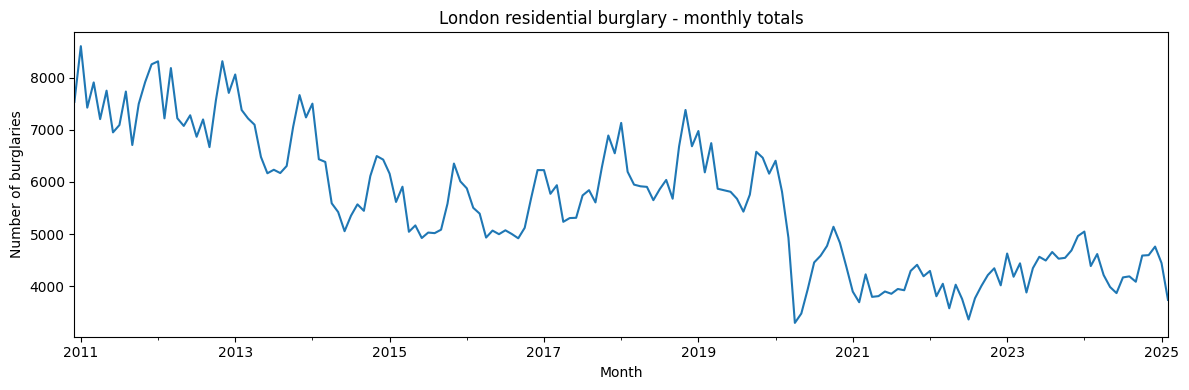

In [5]:
monthly = wm.groupby('Month')['burglaries'].sum()
plt.figure(figsize=(12,4))
monthly.plot()
plt.title('London residential burglary - monthly totals')
plt.ylabel('Number of burglaries')
plt.tight_layout(); plt.show()

## 2 · Top‑20 wards (cumulative 2010‑2025)

C:\Users\tedis\AppData\Local\Temp\ipykernel_17608\3000992466.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top20.index, x=top20.values, orient='h', palette='viridis')


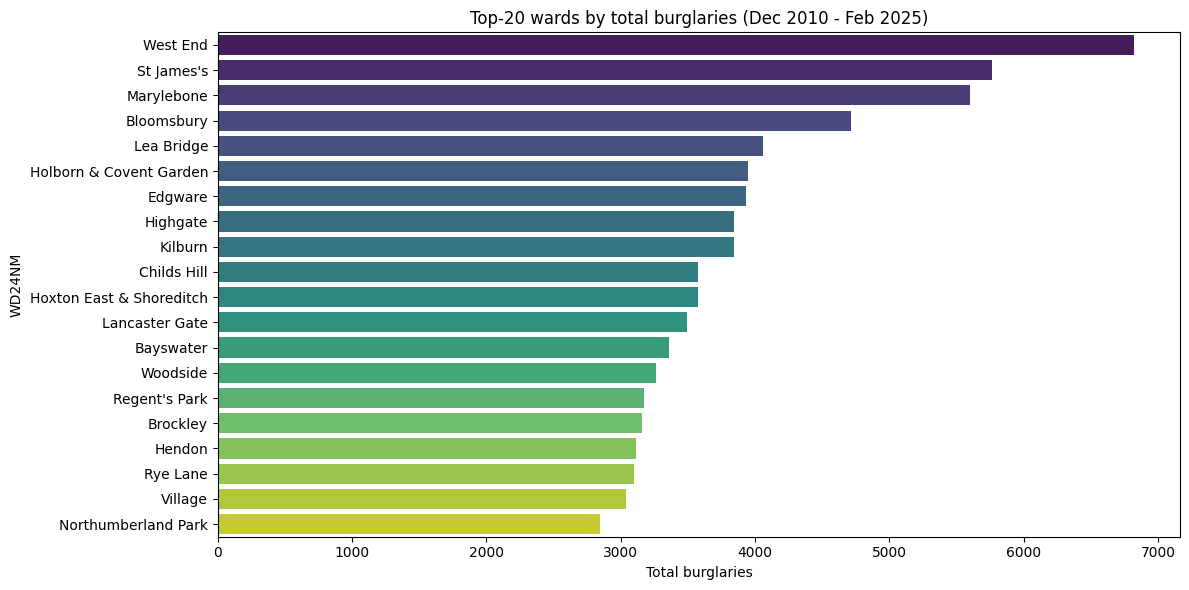

In [6]:
top20 = wm.groupby('WD24NM')['burglaries'].sum().nlargest(20)
plt.figure(figsize=(12,6))
sns.barplot(y=top20.index, x=top20.values, orient='h', palette='viridis')
plt.title('Top-20 wards by total burglaries (Dec 2010 - Feb 2025)')
plt.xlabel('Total burglaries')
plt.tight_layout(); plt.show()

## 3 · Choropleth of latest month

Latest month in data:  2025-02-01


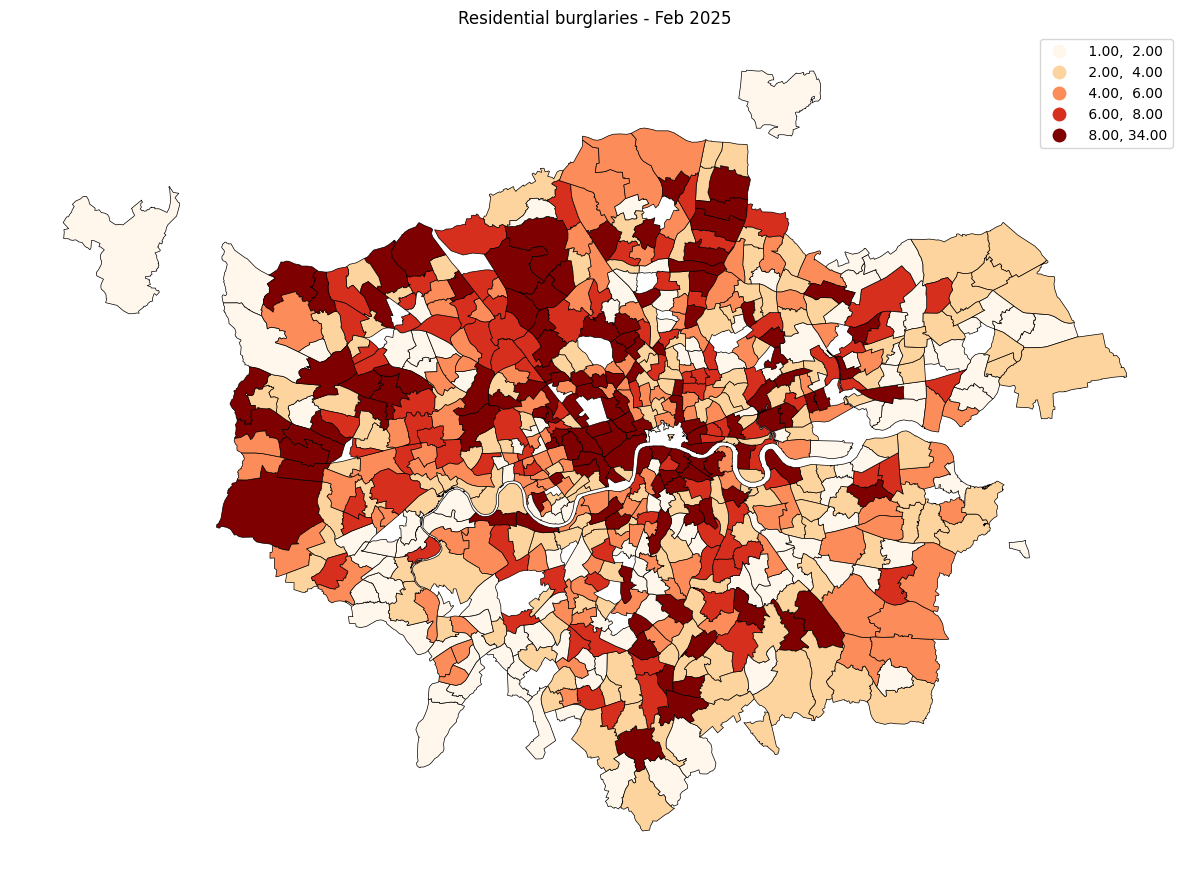

In [7]:
latest_month = wm['Month'].max()
print('Latest month in data: ', latest_month.date())
latest = wm[wm['Month'] == latest_month]
latest_gdf = wards[['WD24CD', 'geometry']].merge(latest, on='WD24CD', how='left')
ax = latest_gdf.plot(column='burglaries', cmap='OrRd', scheme='quantiles', legend=True,
                     figsize=(12,12), edgecolor='black', linewidth=0.5)
ax.set_axis_off()
ax.set_title(f"Residential burglaries - {latest_month.strftime('%b %Y')}")
plt.tight_layout(); plt.show()